In [14]:
import matplotlib.pyplot as plt
import numpy as np

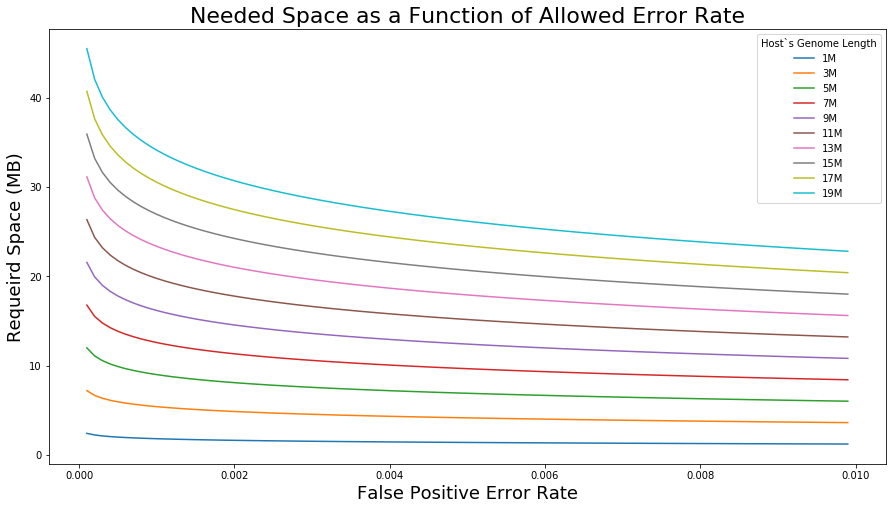

In [98]:
plt.figure(figsize=(15,8))
X = np.arange(0.0001, 0.01, 0.0001)

for x in range(1,21, 2):
    plt.plot(X, -(x*1_000_000 * np.log(X))/np.power(np.log(2),2) / 8e+6, label=f"{x}M")
    
plt.title("Needed Space as a Function of Allowed Error Rate", fontsize=22)     
plt.ylabel('Requeird Space (MB)', fontsize=18)
plt.xlabel('False Positive Error Rate', fontsize=18)
plt.legend(title="Host`s Genome Length");